 **Introduction**
 
Here I will explore the data presented by "UCI Machine Learning" for mushroom classification. The goal of this dataset is to classify between edible (e) to poisonous (p) mushrooms. First, I will analyze the data, by showing it's characteristics, and then I will classify it to achieve maximum accuracy and precision. 

1. Comparison of Feature Importances:
Analyze and compare the differences in feature importances across different models. Identify common features that are consistently important and those that vary between models.

2. Ensemble Methods:
Explore ensemble methods such as stacking or blending to combine predictions from multiple models. This can often improve overall performance and provide more robust results.

3. Model Evaluation:
Assess the overall performance of each model using appropriate metrics such as accuracy, precision, recall, and F1 score. Compare the models and identify their strengths and weaknesses.

4. Cross-Validation:
Implement cross-validation techniques to obtain a more reliable estimate of each model's performance. This helps ensure that the models generalize well to unseen data.

5. Hyperparameter Tuning:
Fine-tune the hyperparameters of each model to optimize their performance. Use techniques like grid search or random search to find the best combination of hyperparameters.

6. Explainability:
Explore model explainability techniques such as SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) to interpret the decisions made by the models, especially for complex models like Random Forest and CatBoost.

7. Dataset Expansion:
If possible, consider obtaining additional data to expand your dataset. More diverse and comprehensive data can potentially lead to more robust models.

8. Feature Engineering:
Experiment with different feature engineering techniques. Create new features or transform existing ones to improve model performance. This can involve domain-specific knowledge and creativity.

9. Visualization:
Create informative visualizations that effectively communicate the results and insights gained from your models. Visualizations can be powerful tools for conveying complex information to a non-technical audience.

10. Documentation and Reporting:
Prepare a comprehensive report that includes the problem statement, methodology, data exploration, model development, results, and conclusions. Clearly communicate your findings and the implications of your research.

https://medium.com/@Kavya2099/optimizing-performance-selectkbest-for-efficient-feature-selection-in-machine-learning-3b635905ed48#1cb1

https://www.aporia.com/learn/feature-importance/feature-importance-7-methods-and-a-quick-tutorial/#:~:text=The%20feature%20importance%20is%20calculated,is%20considered%20the%20most%20important.

df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));**Python libraries**

The libraries for this kernel are:

•	[Numpy](http://http://www.numpy.org/)

•	[Pandas](http://pandas.pydata.org/)

•	[Seaborn](https://seaborn.pydata.org/)

•	[Matplotlib](https://matplotlib.org/)

•	[Graphviz](http://www.graphviz.org/)

•	[Scikit-Learn](http://scikit-learn.org/stable/index.html)



Numpy will be used for linear algebra and fixing arrays, Pandas for data processing, Seaborn for cool visualizations, matplotlib for figures, graphviz for awesome graph visualization and Scikit-Learn for preprocessing and machine learning algorithms.

Importing of those libraries:


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

**Loading the data and initial exploration**

In [2]:
df = pd.read_csv('../input/mushrooms.csv')

In [3]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


From the table above it can be seen that the column "veil-type" is 0 and not contributing to the data so I remove it.

In [6]:
df=df.drop(["veil-type"],axis=1)

The data is categorial. Categorical data cannot typically be directly handled by machine learning algorithms, as most algorithms are primarily designed to operate with numerical data only. Therefore, before categorical features can be used as inputs to machine learning algorithms, they must be encoded as numerical values.

There are several techniques for encoding categorical features, including one-hot encoding, ordinal encoding, and target encoding. The choice of encoding technique depends on the specific characteristics of the data and the requirements of the machine learning algorithm being used.

**Quick look at the characteristics of the data**

The violin plot below represents the distribution of the classification characteristics. It is possible to see that "gill-color" property of the mushroom breaks to two parts, one below 3 and one above 3, that may contribute to the classification. 

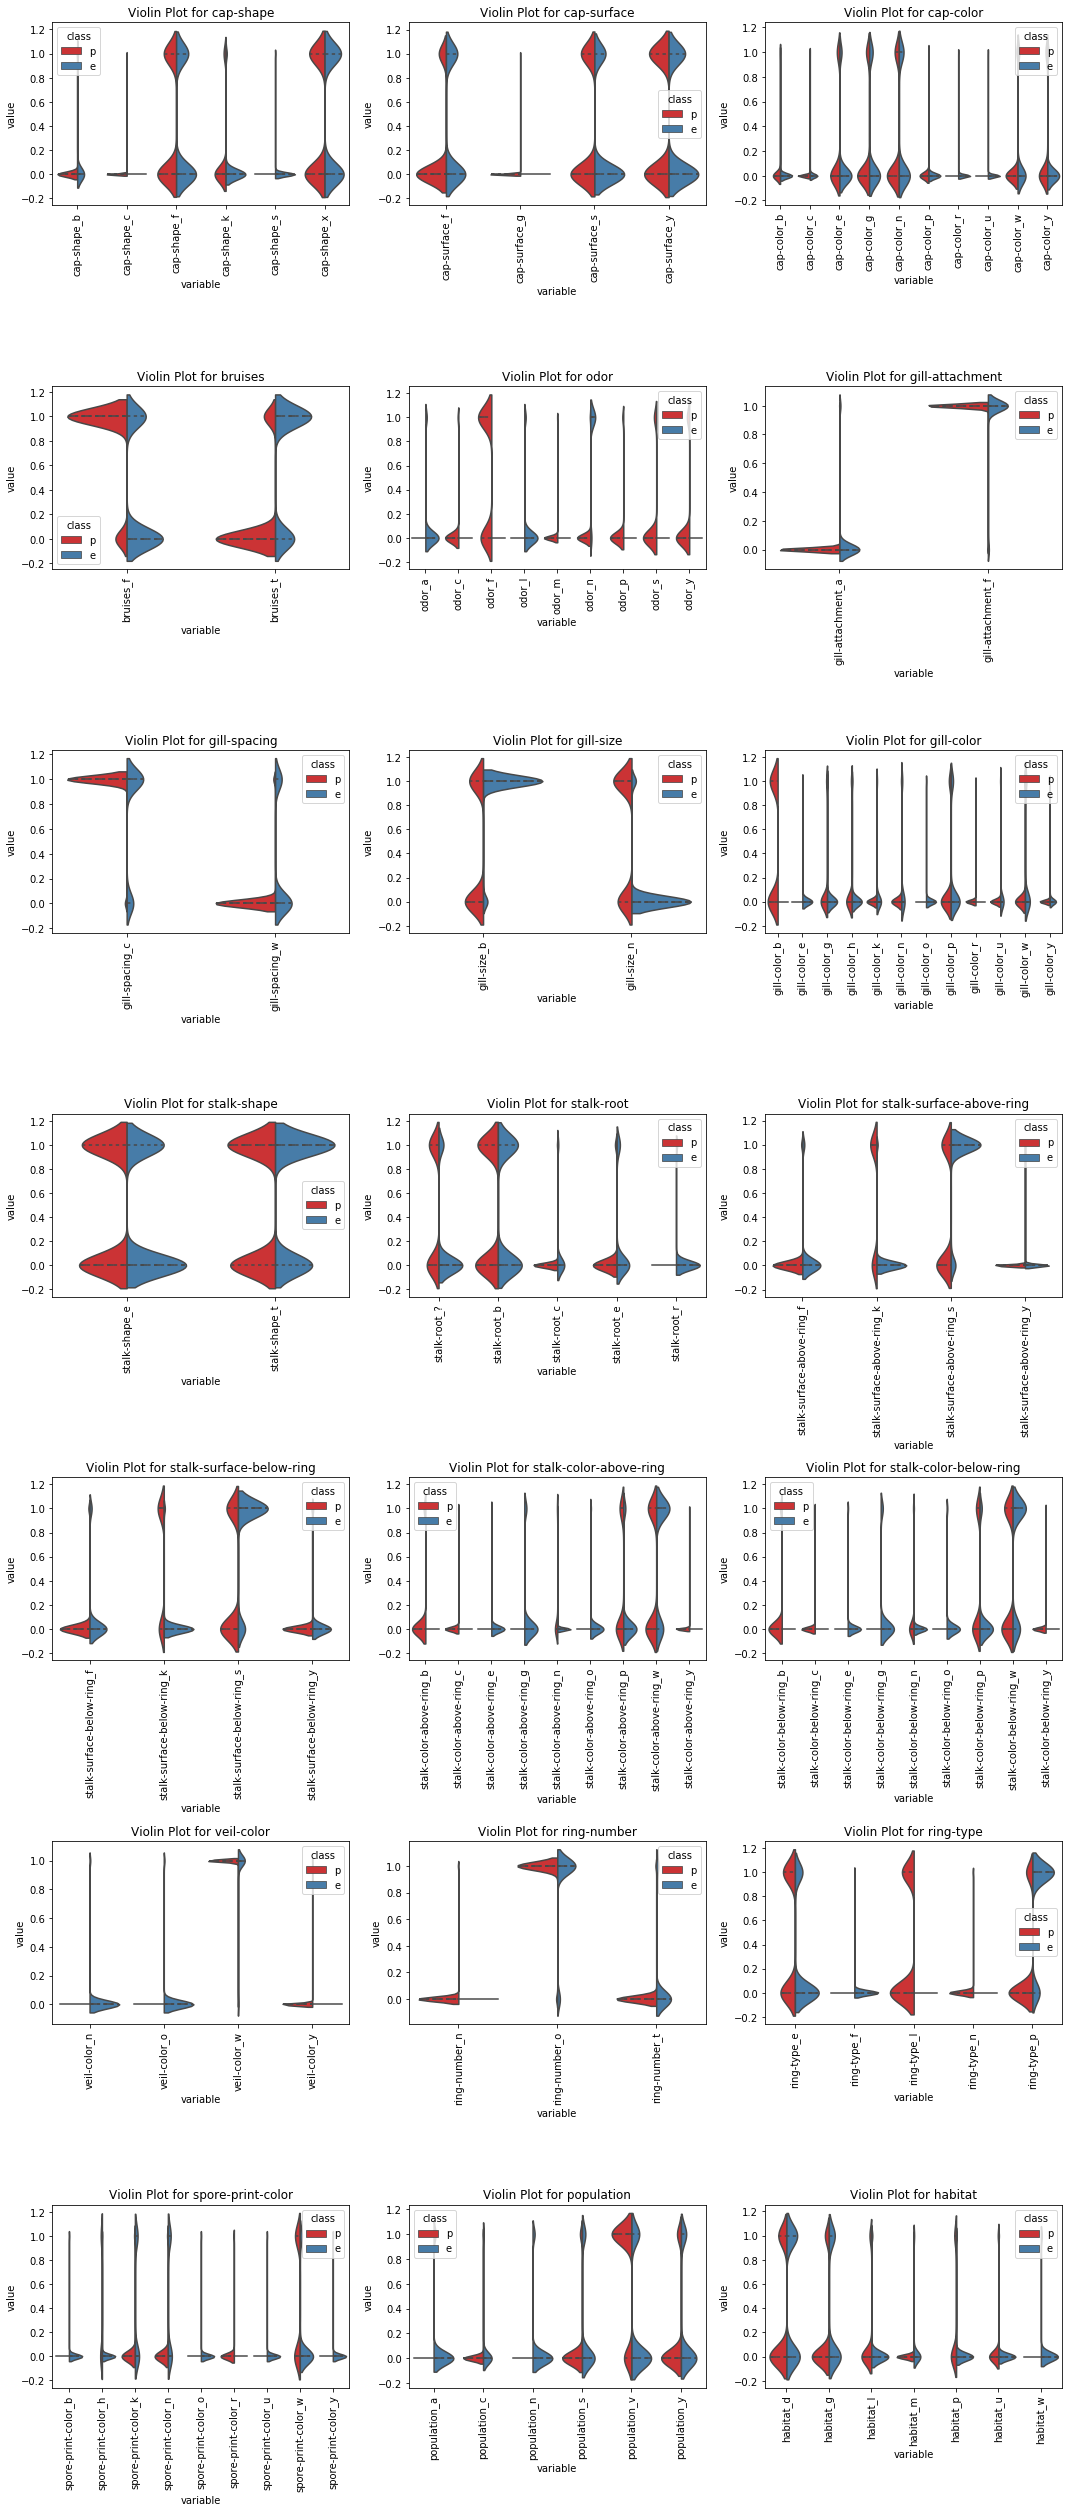

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
target = 'class'

# Get the number of columns (excluding the 'class' column)
num_columns = len(df.columns[df.columns != target])

# Determine the number of rows and columns for the subplot grid
num_rows = (num_columns // 3) + (num_columns % 3)  # Adjust the division factor as needed
num_cols = 3

# Create a subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Loop through columns (excluding the 'class' column)
for i, column in enumerate(df.columns[df.columns != target]):
    feature_of_interest = column

    # Use pd.get_dummies to one-hot encode the selected feature
    df_encoded = pd.get_dummies(df[feature_of_interest], prefix=feature_of_interest)

    # Concatenate the one-hot encoded feature with the target column
    df_aggregated = pd.concat([df[target], df_encoded], axis=1)

    # Melt the DataFrame to long format
    df_melted = pd.melt(df_aggregated, id_vars=[target])

    # Create a violin plot for each column in a specific subplot
    sns.violinplot(ax=axes[i], x='variable', y="value", hue=target, split=True, data=df_melted, inner="quartile", palette='Set1')
    
    axes[i].set_title(f'Violin Plot for {column}')
    axes[i].set_xticklabels(df_melted['variable'].unique(), rotation=90)  # Set unique variable labels

# Adjust layout
plt.tight_layout()
plt.show()


**Is the data balanced?**

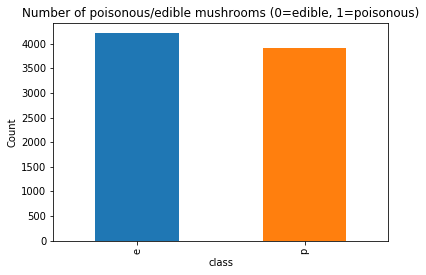

In [8]:
plt.figure()
pd.Series(df['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of poisonous/edible mushrooms (0=edible, 1=poisonous)');

The dataset is balanced

In [9]:
# Apply one-hot encoding to all columns except the target column
df_encoded = pd.get_dummies(df[df.columns[df.columns != 'class']], columns=df.columns[df.columns != 'class'])

# Concatenate with the target column
df_encoded = pd.concat([df['class'], df_encoded], axis=1)

df_encoded['class'] = df_encoded['class'].replace({'p': 0, 'e': 1})

df_encoded

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,...,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
7,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


Let's look at the correlation between the variables:

# Feature Selection

Feature importance is useful for machine learning tasks because it allows practitioners to understand which features in a dataset are contributing most to the final prediction, and which features are less important. This information can be used in a variety of ways:

* Feature selection: By identifying the most important features, practitioners can select a subset of relevant features for use in building a model, reducing dimensionality and noise in the data, and improving model interpretability.
* Model interpretability: By understanding which features are most important, practitioners can gain insights into the underlying relationships in the data and how the model is making predictions.
* Model debugging: If a model is not performing well, feature importance can be used to identify which features may be causing problems and require further investigation.
* Business decision-making: By understanding which features are most important, practitioners can make more informed decisions about which features to collect and how to allocate resources.
* Improving model performance: By removing less important features, practitioners can improve model performance by reducing overfitting and training time.

## 1. SelectKBest and chi2

In [10]:
dict_translate = {
    'bruises_f': "no bruises",
    'bruises_t': "bruises",
    'odor_f': "foul odor",
    'odor_n': "no odor",
    'odor_y': "fishy odor",
    'gill-spacing_w': "crowded gill-spacing",
    'gill-size_b': "gill-spacing",
    'gill-size_n': "broad gill",
    'gill-color_b': "buff gill",
    'stalk-surface-above-ring_k': "silky stalk surface above ring",
    'stalk-surface-above-ring_s': "smooth stalk surface above ring",
    'stalk-surface-below-ring_k': "silky stalk surface below ring",
    'ring-type_l': "large ring",
    'ring-type_p': "pendant ring",
    'spore-print-color_h': "chocolate spore print",
    'spore-print-color_k': "black spore print",
    'spore-print-color_n': "brown spore print",
    'spore-print-color_w': "white spore print",
    'population_v': "several-population",
    'habitat_p': "paths habitat"
}

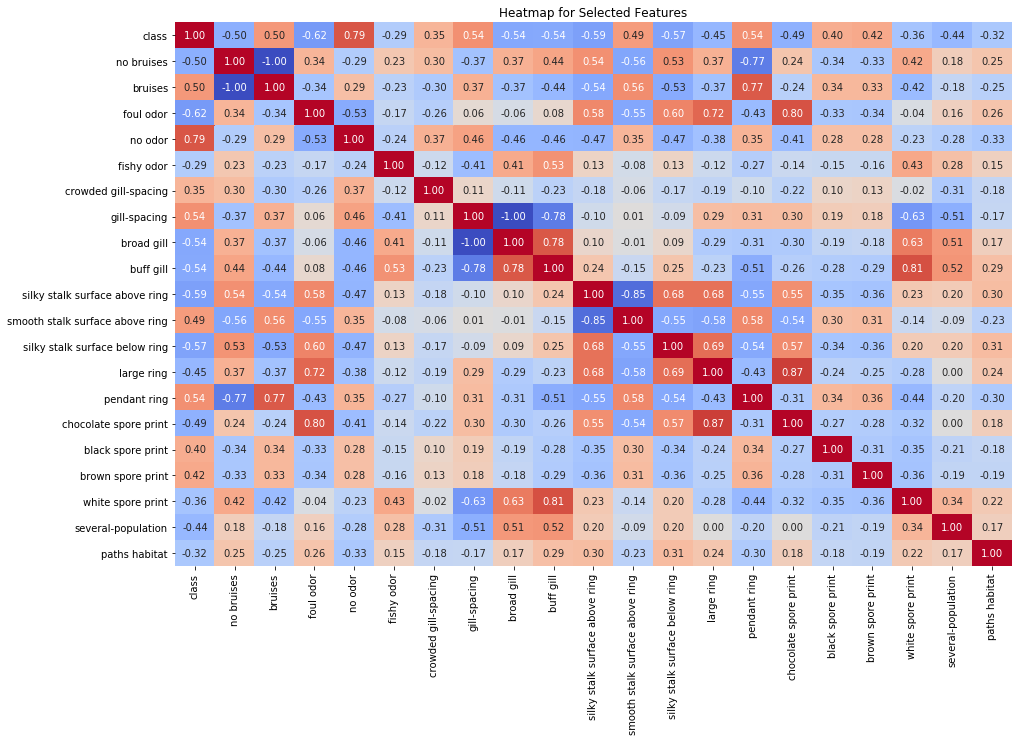

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2

# Assuming your target variable is 'class'
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# 1. Feature Selection with SelectKBest and chi2
# Apply feature selection
selector = SelectKBest(score_func=chi2, k=20)  # Adjust the value of k as needed
X_selected = selector.fit_transform(X, y)

# Get the selected features
selected_features = X.columns[selector.get_support(indices=True)]
translated_selected_features = [dict_translate[feature] for feature in selected_features]

# Create a new DataFrame with selected features and target variable
df_selected = pd.concat([df_encoded['class'], X[selected_features]], axis=1)
df_selected.columns = ['class'] + translated_selected_features  # Rename the columns

# 2. Create a heatmap for selected features
plt.figure(figsize=(15, 10))
sns.heatmap(df_selected.corr(), cmap="coolwarm", annot=True, fmt=".2f", cbar=False)
plt.title('Heatmap for Selected Features')
plt.show()

Most important features:

In [12]:
df_selected.columns

Index(['class', 'no bruises', 'bruises', 'foul odor', 'no odor', 'fishy odor',
       'crowded gill-spacing', 'gill-spacing', 'broad gill', 'buff gill',
       'silky stalk surface above ring', 'smooth stalk surface above ring',
       'silky stalk surface below ring', 'large ring', 'pendant ring',
       'chocolate spore print', 'black spore print', 'brown spore print',
       'white spore print', 'several-population', 'paths habitat'],
      dtype='object')

# Dimensionality Reduction

## 1.  PCA

Explained variance ratio: [0.16810879 0.13889755]
Transformed data after PCA:
[[-0.99624508 -0.94689184]
 [-1.44173278 -0.16415434]
 [-1.52408458 -0.40874639]
 ...
 [-0.28781652 -0.32621391]
 [ 1.93043293 -1.5731628 ]
 [-0.2492971  -0.31229212]]


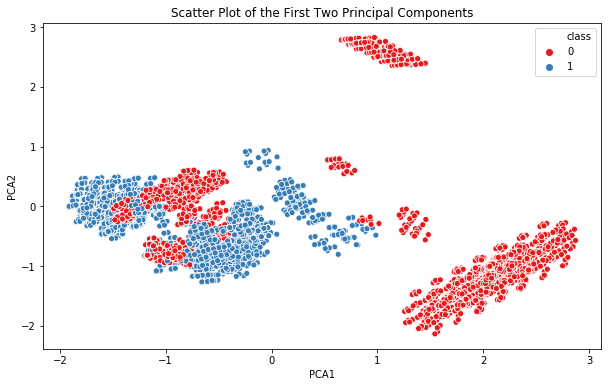

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming your target variable is 'class'
X = df_encoded.drop('class', axis=1)

# 2. Dimensionality Reduction with PCA
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Print the transformed data after dimensionality reduction
print("Transformed data after PCA:")
print(X_pca)

# Create a DataFrame for the transformed data
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['class'] = df_encoded['class']

# Create a scatter plot for the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='class', data=df_pca, palette='Set1')
plt.title('Scatter Plot of the First Two Principal Components')
plt.show()


Choosing t-SNE over PCA might be preferable for visualizing high-dimensional data when class separation is crucial, as t-SNE tends to preserve local structures and non-linear relationships, providing a clearer picture of distinct classes compared to PCA, which focuses on global variance and linear combinations of features.

## 2. t-SNE

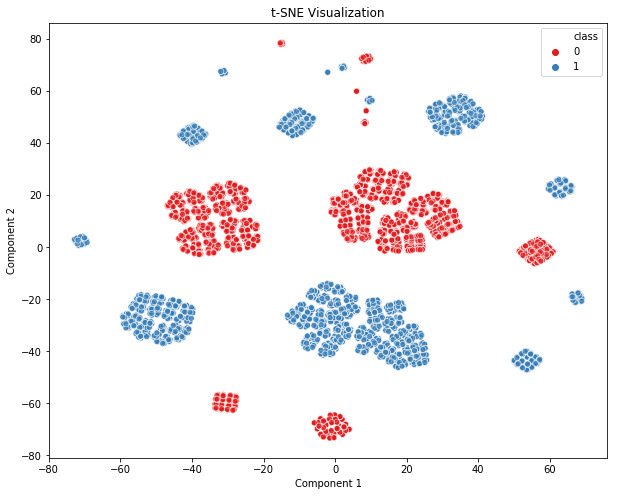

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming your target variable is 'class'
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# 1. Dimensionality Reduction with t-SNE
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the reduced features and target variable
df_tsne = pd.DataFrame(data=X_tsne, columns=['Component 1', 'Component 2'])
df_tsne['class'] = y

# 2. Create a scatter plot for the t-SNE components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Component 1', y='Component 2', hue='class', data=df_tsne, palette='Set1', alpha=0.7)
plt.title('t-SNE Visualization')
plt.show()


### Hierarchical Complexity:
The fractal-like structures hint at a hierarchical complexity, indicating the presence of repeated patterns across different scales. This suggests that certain features exhibit nuanced variations throughout the dataset.

### Distinct Central Clusters:
The presence of two sizable central clusters, surrounded by smaller ones, signifies a pronounced separation. Investigating the defining features of these central groups could unravel unique characteristics contributing to their distinction.

### Spatial Relationships in Edible Clusters:
The ring formation of edible clusters, accompanied by outliers and a disruptive line, suggests spatial relationships between mushroom classes. Outliers may represent instances with unconventional edible characteristics, warranting further scrutiny.

### Dynamic Cluster Transitions:
The broken line of outliers transitioning between clusters of poisonous and edible mushrooms signifies a dynamic boundary region. Understanding the factors governing this transition zone is crucial for discerning the features that dictate edibility.

### Diverse Poisonous Mushroom Subtypes:
The presence of distinct poisonous clusters, both centrally and within the edible ring, implies diverse subtypes with unique characteristics. Further exploration is recommended to uncover nuanced distinctions among different categories of poisonous mushrooms.

### Outliers as Potential Anomalies:
The small outlier clusters represent instances that deviate from the majority's patterns. Investigating these outliers may unearth compelling insights or highlight potential anomalies within the dataset.


**Model, predict and estimate the result:**

In [15]:
X = df_encoded[selected_features]
Y = df_encoded['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

1. Random Forest:
* Ensemble method based on decision trees.
* Robust, handles non-linear relationships well, and less prone to overfitting.
2. Gradient Boosting (e.g., XGBoost, LightGBM, AdaBoost):
* Builds an ensemble of weak learners sequentially, with each learner correcting errors of the previous ones.
* Generally provides high predictive accuracy.
3. Support Vector Machines (SVM):
* Effective for both linear and non-linear relationships.
* Good for high-dimensional spaces, and kernel functions can handle complex data.
4. Logistic Regression:
* Simple and interpretable.
* Suitable for linear relationships and can be a good baseline model.
5. K-Nearest Neighbors (KNN):
* Non-parametric and instance-based, makes predictions based on the majority class of its k-nearest neighbors.
* Can capture local patterns in the data.
6. Neural Networks (Deep Learning):
* Random Forest:Deep learning models, such as Multilayer Perceptrons (MLPs) or Convolutional Neural Networks (CNNs), can capture complex patterns in large datasets.
* Requires more data and computational resources.

## Random Forest:

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=8)

# Perform cross-validation on the training set
cv_scores = cross_val_score(rf_classifier, X_train, Y_train, cv=5)  

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

# Train the classifier on the full training data
rf_classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_test_pred_rf = rf_classifier.predict(X_test)

# Evaluate the accuracy of the model on the test set
accuracy_test = accuracy_score(Y_test, Y_test_pred_rf)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 100.00%
Test Accuracy: 100.00%


In [17]:
# Get feature importances
feature_importance = rf_classifier.feature_importances_
non_zero_importance = feature_importance > 0  # Boolean mask for non-zero importance features
sorted_idx = np.argsort(feature_importance[non_zero_importance])

In [18]:
non_zero_features = X.columns[non_zero_importance][sorted_idx]

# Print feature importances
print("Non-Zero Feature Importances:")
for feature, importance in zip(non_zero_features, feature_importance[non_zero_importance][sorted_idx]):
    print(f"{feature}: {importance:.4f}")

Non-Zero Feature Importances:
odor_y: 0.0018
habitat_p: 0.0018
ring-type_l: 0.0067
stalk-surface-above-ring_s: 0.0126
spore-print-color_w: 0.0139
bruises_t: 0.0151
spore-print-color_k: 0.0207
population_v: 0.0233
spore-print-color_n: 0.0241
bruises_f: 0.0259
gill-spacing_w: 0.0399
gill-color_b: 0.0405
ring-type_p: 0.0492
spore-print-color_h: 0.0580
stalk-surface-below-ring_k: 0.0653
stalk-surface-above-ring_k: 0.0710
gill-size_b: 0.0940
gill-size_n: 0.1012
odor_f: 0.1167
odor_n: 0.2182


### catboost

In [19]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

# Create a CatBoost classifier
cat_classifier = CatBoostClassifier(iterations=20, depth=3, random_state=42)

# Perform cross-validation on the training set
cv_scores = cross_val_score(cat_classifier, X_train, Y_train, cv=5, scoring='accuracy')  # Adjust the number of folds as needed

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

# Train the classifier on the full training data
cat_classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_test_pred_cat = cat_classifier.predict(X_test)

# Evaluate the accuracy of the model on the test set
accuracy_test = accuracy_score(Y_test, Y_test_pred_cat)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

0:	learn: 0.1936044	total: 73.8ms	remaining: 1.4s
1:	learn: 0.0977341	total: 97.1ms	remaining: 874ms
2:	learn: 0.0657327	total: 122ms	remaining: 693ms
3:	learn: 0.0513281	total: 150ms	remaining: 600ms
4:	learn: 0.0400892	total: 173ms	remaining: 520ms
5:	learn: 0.0356739	total: 196ms	remaining: 457ms
6:	learn: 0.0328280	total: 221ms	remaining: 410ms
7:	learn: 0.0277560	total: 242ms	remaining: 363ms
8:	learn: 0.0235385	total: 263ms	remaining: 321ms
9:	learn: 0.0203544	total: 281ms	remaining: 281ms
10:	learn: 0.0181525	total: 303ms	remaining: 248ms
11:	learn: 0.0129956	total: 323ms	remaining: 215ms
12:	learn: 0.0115934	total: 344ms	remaining: 185ms
13:	learn: 0.0085510	total: 364ms	remaining: 156ms
14:	learn: 0.0069754	total: 385ms	remaining: 128ms
15:	learn: 0.0057931	total: 403ms	remaining: 101ms
16:	learn: 0.0050467	total: 423ms	remaining: 74.6ms
17:	learn: 0.0048876	total: 442ms	remaining: 49.1ms
18:	learn: 0.0046332	total: 459ms	remaining: 24.2ms
19:	learn: 0.0045445	total: 478ms	rem

In [20]:
# Get feature importances
feature_importance = cat_classifier.feature_importances_
non_zero_importance = feature_importance > 0  # Boolean mask for non-zero importance features
sorted_idx = np.argsort(feature_importance[non_zero_importance])

In [21]:
# Get feature importances
feature_importance = cat_classifier.feature_importances_
non_zero_importance = feature_importance > 0  # Boolean mask for non-zero importance features
sorted_idx = np.argsort(feature_importance[non_zero_importance])

# Extract non-zero importance features and their importances
non_zero_features = X.columns[non_zero_importance][sorted_idx]
non_zero_importances = feature_importance[non_zero_importance][sorted_idx]

# Print feature importances
print("Non-Zero Feature Importances:")
for feature, importance in zip(non_zero_features, non_zero_importances):
    print(f"{feature}: {importance:.4f}")


Non-Zero Feature Importances:
stalk-surface-above-ring_s: 0.1242
habitat_p: 0.1479
gill-color_b: 0.3616
stalk-surface-above-ring_k: 1.7814
spore-print-color_w: 1.9168
bruises_t: 2.3982
gill-size_n: 3.0450
spore-print-color_h: 3.1424
gill-spacing_w: 3.8800
spore-print-color_n: 4.5472
population_v: 4.7706
spore-print-color_k: 5.9007
gill-size_b: 6.3504
odor_f: 10.3682
bruises_f: 15.5224
odor_n: 35.7431


### SVC

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Perform cross-validation on the training set
cv_scores = cross_val_score(svm_classifier, X_train, Y_train, cv=5, scoring='accuracy')  # Adjust the number of folds as needed

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

# Train the classifier on the full training data
svm_classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_test_pred_svc = svm_classifier.predict(X_test)

# Evaluate the accuracy of the model on the test set
accuracy_test = accuracy_score(Y_test, Y_test_pred_svc)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

Cross-Validation Scores: [0.98538462 0.97923077 0.97461538 0.98       0.9799846 ]
Mean Accuracy: 97.98%
Test Accuracy: 98.15%


In [23]:
# Access coefficients for linear SVM
coefficients = svm_classifier.coef_.flatten()

# Get non-zero coefficients and their corresponding columns
non_zero_coefficients = coefficients[abs(coefficients) > 0.001]

# Get the indices of non-zero coefficients
non_zero_indices = np.where(abs(coefficients) > 0.001)[0]

# Get corresponding column names
non_zero_columns = X.columns[non_zero_indices]

# Sort coefficients by absolute values in descending order
sorted_idx = np.argsort(np.abs(non_zero_coefficients))
sorted_coefficients = non_zero_coefficients[sorted_idx]
sorted_columns = non_zero_columns[sorted_idx]


**Decision tree classifier**


Classification tree predict a qualative response, in contrast to regression tree that predict quantitive response. Classification tree predicts the observation that belong to the most common occurring class from the training data for each region. In order to grow the classification tree the algorithm uses recursive binary splitting. 


The Gini index

The Gini index is a measure of inequality of a system that has values between 0 to 1 (while 0 is perfect equality and 1 is absolute inequality). In other words the Gini index is a measure that define the node purity (value of 0 is pure and value of 1 is not pure).

The Gini index is defined by:
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ2xshC_PkgPeHxdBPNtyo1PlRuXrCdi7P7amZuKZQyKYs9P5ztyQ)

while J is the classes, pi is the fraction of items labeled with class i in the set.

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 100.00%
Test Accuracy: 100.00%


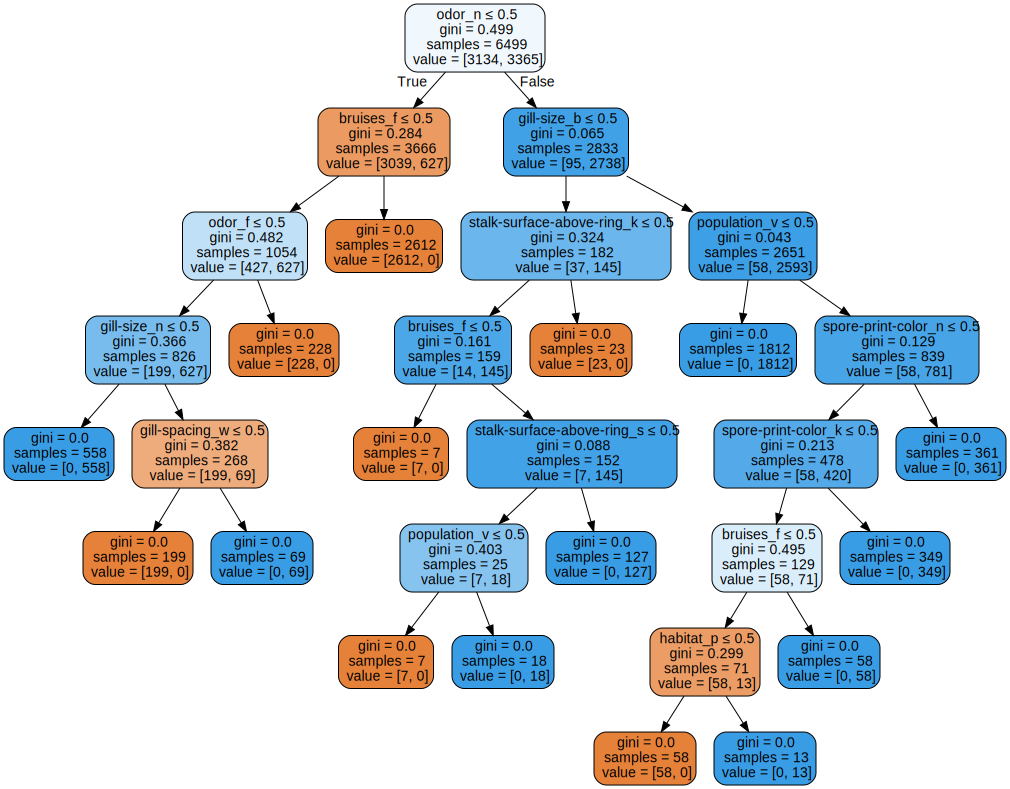

In [24]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import cross_val_score
import graphviz
from sklearn.metrics import accuracy_score

# Create a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=7)

# Perform cross-validation
cv_scores = cross_val_score(dt_classifier, X_train, Y_train, cv=5)  # Adjust the number of folds as needed

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

# Train the classifier on the full training data
dt_classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_test_pred_dt = dt_classifier.predict(X_test)

# Evaluate the accuracy of the model on the test set
accuracy_test = accuracy_score(Y_test, Y_test_pred_dt)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

# Visualize the decision tree
dot_data = export_graphviz(dt_classifier, out_file=None, 
                           feature_names=X.columns,  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

as we see from the heatmap there a lot of correlations between featerues with coefficient close to 0.5, so here is the same situation on graph

**odor_n (Odor: None):**
- The Decision Tree assigns the highest importance to the absence of odor (odor_n).
- If a mushroom has no odor, the Decision Tree is likely to classify it as edible (1).

**odor_f (Odor: Foul):**
- The Decision Tree assigns moderate importance to a foul odor (odor_f).
- A foul odor might contribute to the Decision Tree classifying the mushroom as poisonous (0).

**bruises_f (Bruises: False):**
- The Decision Tree assigns moderate importance to the absence of bruises (bruises_f).
- Mushrooms without bruises are more likely to be classified as edible (1) by the Decision Tree.

**gill-size_n (Gill Size: Narrow):**
- The Decision Tree assigns high importance to narrow gill size (gill-size_n).
- Narrow gill size might contribute to the Decision Tree classifying the mushroom as poisonous (0).

**spore-print-color_k (Spore Print Color: Black):**
- The Decision Tree assigns very high importance to a black spore print color (spore-print-color_k).
- A black spore print color might strongly influence the Decision Tree to classify the mushroom as poisonous (0).

**spore-print-color_n (Spore Print Color: Brown):**
- The Decision Tree assigns very high importance to a brown spore print color (spore-print-color_n).
- Brown spore print color might strongly influence the Decision Tree to classify the mushroom as poisonous (0).

**gill-size_b (Gill Size: Broad):**
- The Decision Tree assigns high importance to broad gill size (gill-size_b).
- Broad gill size might contribute to the Decision Tree classifying the mushroom as edible (1).

**stalk-surface-above-ring_k (Stalk Surface Above Ring: Silky):**
- The Decision Tree assigns moderate importance to a silky stalk surface above the ring (stalk-surface-above-ring_k).
- A silky stalk surface might contribute to the Decision Tree classifying the mushroom as edible (1).

**gill-spacing_w (Gill Spacing: Close):**
- The Decision Tree assigns moderate importance to close gill spacing (gill-spacing_w).
- Close gill spacing might contribute to the Decision Tree classifying the mushroom as edible (1).

**spore-print-color_h (Spore Print Color: Chocolate):**
- The Decision Tree assigns moderate importance to a chocolate spore print color (spore-print-color_h).
- A chocolate spore print color might contribute to the Decision Tree classifying the mushroom as edible (1).


## Feature importances

By all methods examined before the feature that is most important is "odor_n".

In [25]:
# Get feature importances
feature_importance = dt_classifier.feature_importances_

# Get non-zero feature importances and their corresponding columns
non_zero_importances = feature_importance[feature_importance != 0]
non_zero_columns = df_selected.columns[1:][feature_importance != 0]

# Sort feature importances by values in descending order
sorted_idx = np.argsort(non_zero_importances)
sorted_importances = non_zero_importances[sorted_idx]
sorted_columns = non_zero_columns[sorted_idx]


In [26]:
# Access coefficients for linear SVM
coefficients_svm = svm_classifier.coef_.flatten()

# Set a threshold for non-zero coefficients for SVM
non_zero_mask_svm = np.abs(coefficients_svm) != 0

# Get non-zero coefficients and their corresponding columns for SVM
non_zero_coefficients_svm = coefficients_svm[non_zero_mask_svm]
non_zero_columns_svm = df_selected.columns[1:][non_zero_mask_svm]

In [27]:
# Создаем пустой датафрейм для хранения данных отчетов
report_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1-Score', 'Support'])

# Создаем функцию для добавления отчета в датафрейм
def add_report_to_df(model_name, y_true, y_pred, df):
    report_str = classification_report(y_true, y_pred)
    lines = report_str.split('\n')
    model_data = lines[-2].split()
    df = df.append({'Model': model_name,
                    'Precision': float(model_data[3]), 
                    'Recall': float(model_data[4]), 
                    'F1-Score': float(model_data[5]), 
                    'Support': float(model_data[6])}, ignore_index=True)
    return df

# Добавляем данные для каждой модели
report_df = add_report_to_df('Random Forest', Y_test, Y_test_pred_rf, report_df)
report_df = add_report_to_df('CatBoost', Y_test, Y_test_pred_cat, report_df)
report_df = add_report_to_df('SVC', Y_test, Y_test_pred_svc, report_df)
report_df = add_report_to_df('Decision Tree', Y_test, Y_test_pred_dt, report_df)

# Выводим полученный датафрейм
print(report_df)


           Model  Precision  Recall  F1-Score  Support
0  Random Forest       1.00    1.00      1.00   1625.0
1       CatBoost       1.00    1.00      1.00   1625.0
2            SVC       0.98    0.98      0.98   1625.0
3  Decision Tree       1.00    1.00      1.00   1625.0


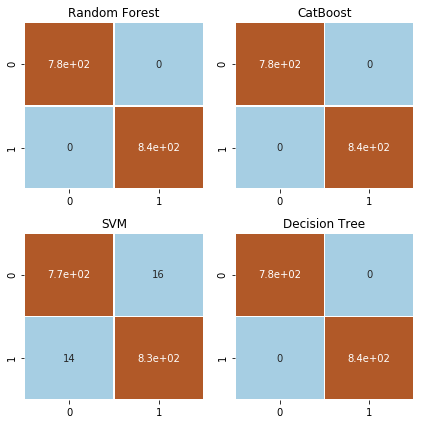

In [28]:
# Создание фигуры с сеткой 2x2 для визуализации матриц ошибок
fig, axes = plt.subplots(2, 2, figsize=(6, 6))

# Матрица ошибок для модели случайного леса
cm = confusion_matrix(Y_test, Y_test_pred_rf)
sns.heatmap(cm, annot=True, cmap="Paired", linewidths=.5, cbar=None, ax=axes[0, 0])
axes[0, 0].set_title('Random Forest')

# Матрица ошибок для модели CatBoost
cm = confusion_matrix(Y_test, Y_test_pred_cat)
sns.heatmap(cm, annot=True, cmap="Paired", linewidths=.5, cbar=None, ax=axes[0, 1])
axes[0, 1].set_title('CatBoost')

# Матрица ошибок для модели SVM
cm = confusion_matrix(Y_test, Y_test_pred_svc)
sns.heatmap(cm, annot=True, cmap="Paired", linewidths=.5, cbar=None, ax=axes[1, 0])
axes[1, 0].set_title('SVM')

# Матрица ошибок для модели решающего дерева
cm = confusion_matrix(Y_test, Y_test_pred_dt)
sns.heatmap(cm, annot=True, cmap="Paired", linewidths=.5, cbar=None, ax=axes[1, 1])
axes[1, 1].set_title('Decision Tree')

# Размещение осей
plt.tight_layout()
plt.show()


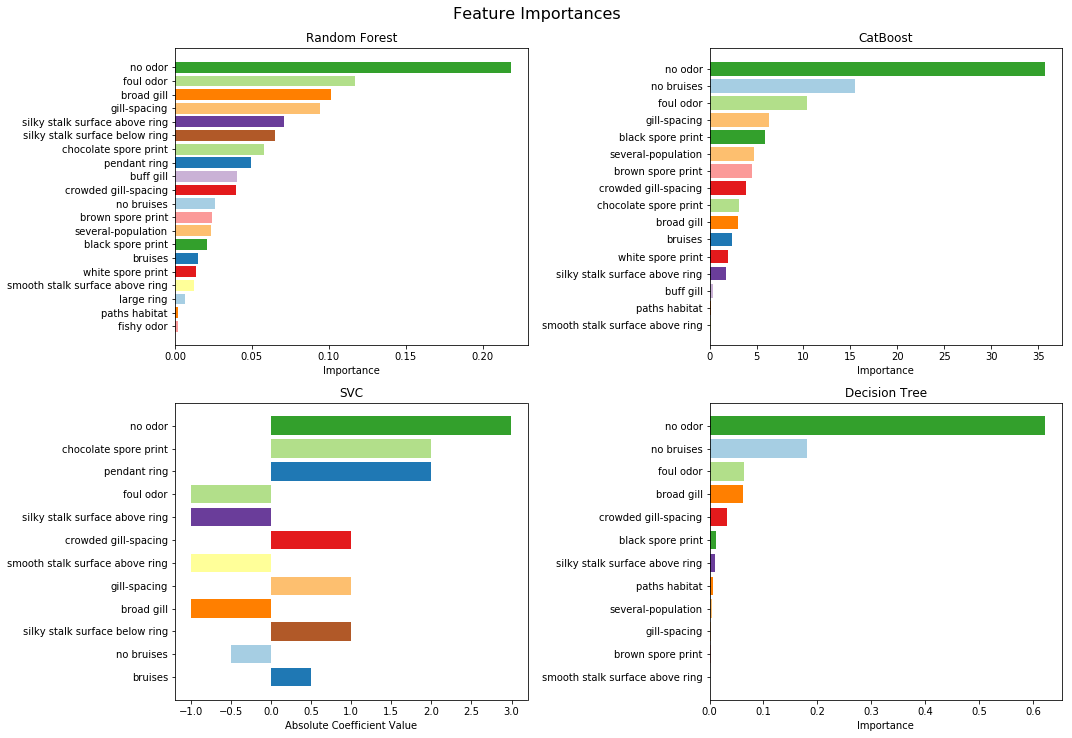

In [29]:
# Define a custom color dictionary for features
feature_colors = dict(zip(df_selected.columns[1:], sns.color_palette("Paired", n_colors=len(df_selected.columns[1:]))))

# Function to plot feature importances for different models
def plot_model_feature_importances(ax, model, name, columns, feature_colors):
    if hasattr(model, 'feature_importances_'):
        # For models with feature_importances_ attribute (Random Forest, CatBoost)
        feature_importance = model.feature_importances_
        non_zero_importance = feature_importance > 0.001  # Adjust the threshold as needed
        sorted_idx = np.argsort(feature_importance[non_zero_importance])
        ax.barh(range(len(sorted_idx)), feature_importance[non_zero_importance][sorted_idx],
                align='center', color=[feature_colors[col] for col in columns[1:][non_zero_importance][sorted_idx]])
        ax.set_yticks(range(len(sorted_idx)))
        ax.set_yticklabels(columns[1:][non_zero_importance][sorted_idx])  # Use column names directly, excluding the first column
        ax.set_xlabel('Importance')
        ax.set_title(f'{name}')
    elif hasattr(model, 'coef_'):
        # For models with coef_ attribute (Linear SVM)
        coefficients = model.coef_.flatten()
        non_zero_coefficients = coefficients[abs(coefficients) > 0.001]
        non_zero_columns = columns[1:][coefficients != 0]
        sorted_idx = np.argsort(np.abs(non_zero_coefficients))
        ax.barh(range(len(sorted_idx)), non_zero_coefficients[sorted_idx],
                align='center', color=[feature_colors[col] for col in non_zero_columns[sorted_idx]])
        ax.set_yticks(range(len(sorted_idx)))
        ax.set_yticklabels(non_zero_columns[sorted_idx])  # Use column names directly, excluding the first column
        ax.set_xlabel('Absolute Coefficient Value')
        ax.set_title(f'{name}')
    else:
        ax.axis('off')
        ax.set_title(f"Feature importances not available for {name}")

# Create a 2x2 grid for subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot feature importances for each model in the grid
plot_model_feature_importances(axs[0, 0], rf_classifier, 'Random Forest', df_selected.columns, feature_colors)
plot_model_feature_importances(axs[0, 1], cat_classifier, 'CatBoost', df_selected.columns, feature_colors)
plot_model_feature_importances(axs[1, 0], svm_classifier, 'SVC', df_selected.columns, feature_colors)
plot_model_feature_importances(axs[1, 1], dt_classifier, 'Decision Tree', df_selected.columns, feature_colors)

fig.suptitle('Feature Importances', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Analysis

In [30]:
from sklearn.preprocessing import MinMaxScaler

# Create a DataFrame to store feature importances
df_feature_importance = pd.DataFrame(df_selected.columns[1:])

# Function to calculate and store feature importances for each model
def calculate_feature_importance(model, model_name):
    if hasattr(model, 'feature_importances_'):
        # For models with feature_importances_ attribute (Random Forest, CatBoost)
        df_feature_importance[model_name] = model.feature_importances_
    elif hasattr(model, 'coef_'):
        # For models with coef_ attribute (Linear SVM)
        df_feature_importance[model_name] = np.abs(model.coef_.flatten())

# Calculate feature importances for each model
calculate_feature_importance(rf_classifier, 'RF')
calculate_feature_importance(cat_classifier, 'CatBoost')
calculate_feature_importance(svm_classifier, 'SVM')
calculate_feature_importance(dt_classifier, 'Decision Tree')

# Normalise and calculate average values for each feature across all models
df_feature_importance.iloc[:, 1:] = MinMaxScaler().fit_transform(df_feature_importance.iloc[:, 1:])
df_feature_importance['Average'] = df_feature_importance.mean(axis=1)

# Sort the DataFrame by the average values in descending order
df_feature_importance = df_feature_importance.sort_values(by='Average', ascending=False)
df_feature_importance = df_feature_importance.round(6)
df_feature_importance = df_feature_importance.rename(columns={df_feature_importance.columns[0]: 'Feature'})

df_feature_importance

,Feature,RF,CatBoost,SVM,Decision Tree,Average
3,no odor,1.000000,1.000000,1.000000,1.000000,1.000000
2,foul odor,0.530986,0.290076,0.333487,0.101823,0.314093
0,no bruises,0.111477,0.434275,0.166722,0.289920,0.250599
7,broad gill,0.459307,0.085190,0.333305,0.098724,0.244131
6,gill-spacing,0.426102,0.177668,0.333305,0.005544,0.235654
15,black spore print,0.087222,0.165085,0.666395,0.018830,0.234383
16,brown spore print,0.103148,0.127219,0.666413,0.002995,0.224944
9,silky stalk surface above ring,0.319883,0.049839,0.333421,0.016527,0.179917
14,chocolate spore print,0.259874,0.087918,0.333161,0.000000,0.170238
5,crowded gill-spacing,0.175834,0.108552,0.333400,0.050672,0.167114


## Mushroom Safety Research Summary

### Features Mostly Associated with 'Edible' Mushrooms:
1. **Odor_n (Odor: None):**
   - Across all models, the absence of odor consistently stands out with the highest importance scores.
   - The lack of odor is a robust indicator of edible mushrooms.

2. **Bruises_f (Bruises: False):**
   - The absence of bruises is another significant indicator of 'edible' mushrooms.
   - Mushrooms without bruises are more likely to be classified as 'edible' by the models.

3. **Spore-print-color_h (Spore Print Color: Chocolate):**
   - In some models, a chocolate spore print color is associated with 'edible' mushrooms.

### Features Mostly Associated with 'Poisonous' Mushrooms:
1. **Odor_f (Odor: Foul):**
   - A foul odor is moderately important in some models, suggesting its association with 'poisonous' mushrooms.

2. **Spore-print-color_k (Spore Print Color: Black) and spore-print-color_n (Spore Print Color: Brown):**
   - A black or brown spore print color is highly important in some models, indicating a strong association with 'poisonous' mushrooms.

3. **Gill-size_n (Gill Size: Narrow):**
   - Narrow gill size is associated with 'poisonous' mushrooms, especially in certain models.

### Features with Varying Importance Across Models:
1. **Gill-size_b (Gill Size: Broad):**
   - This feature shows varying importance across models, suggesting differences in model preferences for its contribution to predictions.

### Features with Negligible Importance:
1. **Odor_y (Odor: Yes), Habitat_p (Habitat: Paths), Ring-type_l, Spore-print-color_w:**
   - These features have negligible overall importance scores, indicating minimal contribution to the models.

### Features Showing Potential Redundancy or Correlation:
1. **Gill-spacing_w and Stalk-surface-above-ring_k:**
   - These features have similar overall importance scores, raising the possibility of redundancy or correlation.

This research aims to help individuals identify potentially dangerous mushrooms by understanding key features associated with toxicity. Always exercise caution and seek expert advice when foraging for mushrooms.
